# Exercise 5: Logistic Regression 

In this exercise, you will use logistic regression to classify breast cancer as either malignant or benign. First run the code below to print and read the description of the data set.  

In [2]:
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

DataCancer=load_breast_cancer()
print(DataCancer.keys())
print(DataCancer.DESCR)

X_features=DataCancer.data
Y_targetClass=DataCancer.target

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were c

### Scale the features  to have zero mean and unit variance. Use scaled features in all the following questions. Also, please  use random_state = 0 in the train_test_split whenever used.

#### A)   Use logistic regression, without regularization (penalty='none'). Find the accuracy of the model.  
- You may need to change the solver (the optimization method) as well as the iterations (max_iteration) for results of optimization to converge. You can for example set, solver='lbfgs', max_iter=1000 in the logistic regression function. Learn more about input arguments of logistic regression function here: 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y_targetClass, random_state=0)

scaler = StandardScaler().fit(X_train)

X_train_t = scaler.transform(X_train)
X_test_t = scaler.transform(X_test)

LogRegModel = LogisticRegression(solver='lbfgs', max_iter=1000, penalty='none')
LogRegModel.fit(X_train_t, Y_train)

print('Accuracy: %.2f' % LogRegModel.score(X_test_t, Y_test))

Accuracy: 0.94


#### B)  Apply Ridge regularization to Logistic regression. Try tuning parameters [0.01, 0.1, 1, 10, 100] and plot the coefficient of the first feature at each value of the regularization tuning parameter. What do you observe? Is your observation expected?

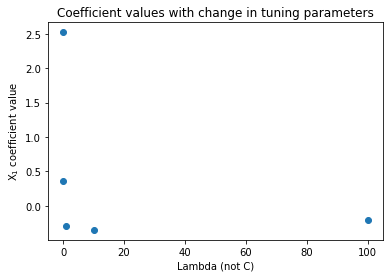

In [8]:
coefs = []
params = [0.01, 0.1, 1, 10, 100]

for lambd in params:
    c = 1 / lambd
    LogRegModel = LogisticRegression(penalty='l2', C=c, solver='lbfgs', max_iter=1000)
    LogRegModel.fit(X_train_t, Y_train)
    
    coefs.append(LogRegModel.coef_[0][0])
    
plt.scatter(params, coefs)
plt.xlabel('Lambda (not C)')
plt.ylabel('X$_1$ coefficient value')
plt.title('Coefficient values with change in tuning parameters')
plt.show()

**(AP)**: This observation is consistent with the properties of ridge regression. A larger lambda (smaller c) means that there is more of a shrinkage penalty, meaning that the coefficients will tend towards 0. This is what is observed in the plots above.

#### C) Find the best tuning parameter of Ridge regularization in logistic regression using 5-fold cross validation. Here also try the tuning parameter values of [0.01, 0.1, 1, 10, 100]. Print the best tuning parameters and the accuracy when the best tuning parameters is selected. 

In [19]:
params = [0.01, 0.1, 1, 10, 100]

X_trainval = X_train
Y_trainval = Y_train
X_trainval_t = scaler.transform(X_trainval)

best_acc = 0
best_lambd = params[0]

for lambd in params:
    c = 1 / lambd
    LogRegModel = LogisticRegression(C=c, solver='lbfgs', max_iter=1000)
    scores = cross_val_score(LogRegModel, X_trainval_t, Y_trainval, cv=5)
    mean = scores.mean()
    
    if mean > best_acc:
        best_acc = mean
        best_lambd = lambd

print('Best tuning parameter is lambda = %.2f.' % best_lambd)
print('Trainval accuracy with this tuning parameter = %.2f.' % best_acc)

BestModel = LogisticRegression(C=1/best_lambd, solver='lbfgs', max_iter=1000)
BestModel.fit(X_trainval_t, Y_trainval)
print('Test accuracy with this tuning parameter = %.2f' % BestModel.score(X_test_t, Y_test))

Best tuning parameter is lambda = 1.00.
Trainval accuracy with this tuning parameter = 0.98.
Test accuracy with this tuning parameter = 0.96


#### D) From the model in previous part with the best tuning parameter selected, use the Sigmoid function to find the probability that the first test example is predicted as class 1 (malignant). 

In [22]:
probabilities = BestModel.predict_proba(X_test_t)

print(f'Probability that first test example is malignant is {probabilities[0][1]}.')

Probability that first test example is malignant is 0.0013613865587136708.
